In [145]:
import pandas  as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [146]:
FOLDER= 'Cat_dog_img'

In [147]:
# É necessário uma redução do número de imagens para não ultrapassar o limite de RAM.
for i in range(500, 12500):
  os.remove(f'Cat_dog_img/cat.{i}.jpg')
  os.remove(f'Cat_dog_img/dog.{i}.jpg')

In [148]:
files = []
labels = []
for file in listdir(FOLDER):
  files.append(file)
  labels.append(file.split('.')[0])

In [149]:
df = pd.DataFrame({
    'file': files,
    'label': labels
})

In [150]:
def show_image(indice):
  filename = FOLDER + '/' + df.iloc[indice]['file']
  img = imread(filename)
  plt.title('a ' + df.iloc[indice]['label'])
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [151]:
df

,file,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.101.jpg,cat
...,...,...
995,dog.95.jpg,dog
996,dog.96.jpg,dog
997,dog.97.jpg,dog
998,dog.98.jpg,dog


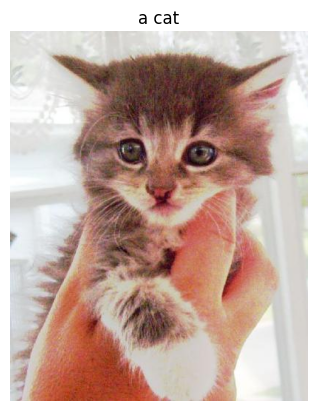

In [152]:
show_image(3)

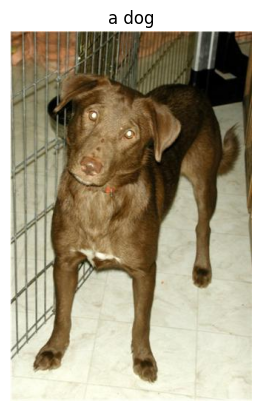

In [153]:
show_image(501)

In [154]:
X = df['file']
Y = df['label']

In [155]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

In [156]:
from keras.preprocessing.image import ImageDataGenerator

In [157]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=25,
    horizontal_flip=True,
    height_shift_range=0.2,
    width_shift_range=0.2
)

In [158]:
df_train = pd.DataFrame()
df_train['file'] = x_train
df_train['label'] = y_train

In [159]:
train_data = train_datagen.flow_from_dataframe(
   df_train,
   directory=FOLDER,
   x_col='file',
   y_col='label',
   target_size=(128,128),
   class_mode='binary'
)

Found 700 validated image filenames belonging to 2 classes.


In [160]:
df_test = pd.DataFrame()
df_test['file'] = x_test
df_test['label'] = y_test

In [161]:
test_datagen = ImageDataGenerator(
    rescale=1/255
)

test_data = test_datagen.flow_from_dataframe(
   df_test,
   directory= FOLDER,
   x_col='file',
   y_col='label',
   target_size=(128,128),
   class_mode='binary'
)

Found 300 validated image filenames belonging to 2 classes.


In [162]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

In [163]:
model = Sequential()

In [164]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [165]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

In [166]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 14, 14, 128)    

In [167]:
history = model.fit_generator(
    train_data,
    validation_data=test_data,
    epochs=10
)

Epoch 1/10
22/22 [==============================] - 9s 388ms/step - loss: 0.7402 - accuracy: 0.5086 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/10
22/22 [==============================] - 6s 266ms/step - loss: 0.6915 - accuracy: 0.5071 - val_loss: 0.6861 - val_accuracy: 0.5000
Epoch 3/10
22/22 [==============================] - 6s 258ms/step - loss: 0.6815 - accuracy: 0.5343 - val_loss: 0.6730 - val_accuracy: 0.5733
Epoch 4/10
22/22 [==============================] - 6s 259ms/step - loss: 0.6547 - accuracy: 0.6029 - val_loss: 0.6827 - val_accuracy: 0.6100
Epoch 5/10
22/22 [==============================] - 6s 259ms/step - loss: 0.6395 - accuracy: 0.6400 - val_loss: 0.6550 - val_accuracy: 0.6333
Epoch 6/10
22/22 [==============================] - 6s 257ms/step - loss: 0.6363 - accuracy: 0.6143 - val_loss: 0.6610 - val_accuracy: 0.5933
Epoch 7/10
22/22 [==============================] - 6s 259ms/step - loss: 0.6291 - accuracy: 0.6257 - val_loss: 0.6558 - val_accuracy: 0.6000
Epoch 

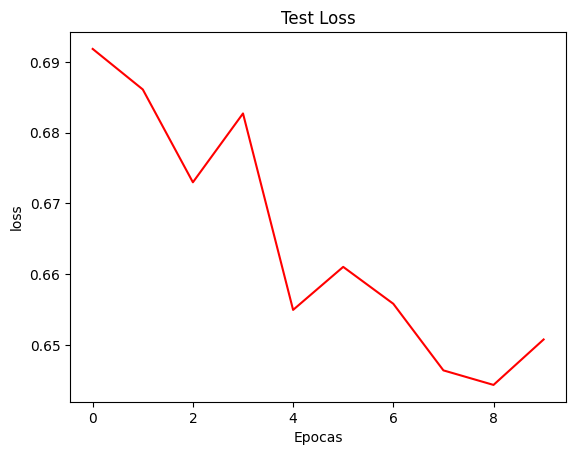

In [171]:
plt.plot(history.history['val_loss'], c='r', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Epocas')
plt.ylabel('loss')
plt.show()

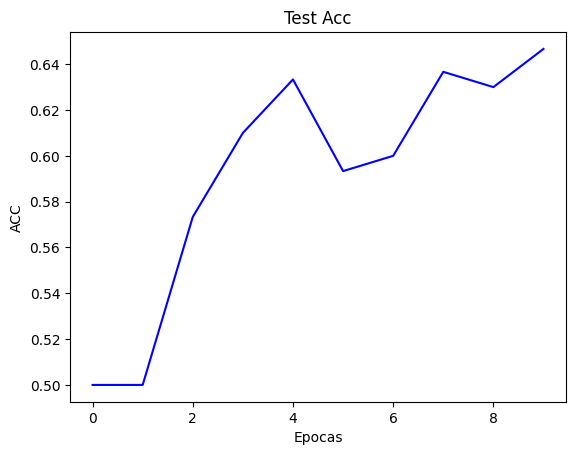

In [172]:
plt.plot(history.history['val_accuracy'], c='b', label='Acc')
plt.title('Test Acc')
plt.xlabel('Epocas')
plt.ylabel('ACC')
plt.show()

In [170]:
df

,file,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.101.jpg,cat
...,...,...
995,dog.95.jpg,dog
996,dog.96.jpg,dog
997,dog.97.jpg,dog
998,dog.98.jpg,dog
